### 读取原始数据并将时刻、月份处理

定义switch函数

In [35]:
import numpy as np
NEW_FILE3 = 'D:/datasets/solar/new_data/new_data3.csv'
def switch(apple):
    if type(apple) != str:
        if apple < 305:year = 2016;apple+=61
        elif apple< 670:year = 2017;apple+=61
        else:year = 2018;apple+=61
        apple%=365
        if apple == 0:month = 12;day = 31
        elif apple <= 31:month = 1;day = apple
        elif apple <= 59:month = 2;day = apple-31
        elif apple <= 90:month = 3;day = apple-59
        elif apple <= 120:month = 4;day = apple - 90
        elif apple <= 151:month = 5;day = apple - 120
        elif apple <= 181:month = 6;day = apple - 151
        elif apple <= 212:month = 7;day = apple - 181
        elif apple <= 243:month = 8;day = apple - 212
        elif apple <= 273:month = 9;day = apple - 243
        elif apple <= 304:month = 10;day = apple - 273
        elif apple <= 334:month = 11;day = apple - 304
        elif apple <= 365:month = 12;day = apple - 334
        return '%d/%d/%d'%(year,month,day)
        
    elif type(apple) == str:
        a = apple.split('/')
        year = int(a[0])
        month = int(a[1])
        day = int(a[2])
        number = 0
        if month <= 2:number+=(month-1)*31+day   
        elif month <= 7:
            if month%2 == 1:number+=59+day+(month-3)*30.5
            elif month%2 == 0:number+=90+day+(month-4)*30.5
        else:
            if month%2 == 0:number+=212+day+(month-8)*30.5
            elif month%2 == 1:number+=243+day+(month-9)*30.5
        if year == 2016:number-=61
        elif year == 2017:number+=304
        elif year == 2018:number+=669
        return number 
data = np.loadtxt(NEW_FILE3,delimiter=',',skiprows=1)
for i in range(len(data)):
    
    if data[i][1] == 1:data[i][1] = 1.705
    elif data[i][1] == 2:data[i][1] = 1.823
    elif data[i][1] == 3:data[i][1] = 1.706
    elif data[i][1] == 4:data[i][1] = 1.561
    elif data[i][1] == 5:data[i][1] = 1.382
    elif data[i][1] == 6:data[i][1] = 1.297
    elif data[i][1] == 7:data[i][1] = 1.465
    elif data[i][1] == 8:data[i][1] = 1.642
    elif data[i][1] == 9:data[i][1] = 1.697
    elif data[i][1] == 10:data[i][1] = 1.776
    elif data[i][1] == 11:data[i][1] = 1.73
    elif data[i][1] == 12:data[i][1] = 1.641
    
    if data[i][2] == 8.0:data[i][2] = 4.997
    elif data[i][2] == 8.5:data[i][2] = 8.631
    elif data[i][2] == 9.0:data[i][2] = 12.103
    elif data[i][2] == 9.5:data[i][2] = 14.982
    elif data[i][2] == 10.0:data[i][2] = 17.569
    elif data[i][2] == 10.5:data[i][2] = 19.623
    elif data[i][2] == 11.0:data[i][2] = 21.311
    elif data[i][2] == 11.5:data[i][2] = 22.565
    elif data[i][2] == 12.0:data[i][2] = 23.349
    elif data[i][2] == 12.5:data[i][2] = 23.464
    elif data[i][2] == 13.0:data[i][2] = 23.431
    elif data[i][2] == 13.5:data[i][2] = 23.023
    elif data[i][2] == 14.0:data[i][2] = 21.917
    elif data[i][2] == 14.5:data[i][2] = 20.513
    elif data[i][2] == 15.0:data[i][2] = 19.129
    elif data[i][2] == 15.5:data[i][2] = 17.108
    elif data[i][2] == 16.0:data[i][2] = 14.687
    elif data[i][2] == 16.5:data[i][2] = 11.826
    elif data[i][2] == 17.0:data[i][2] = 8.88
    elif data[i][2] == 17.5:data[i][2] = 5.4075
    elif data[i][2] == 18.0:data[i][2] = 2.4706
    
    if data[i][-1] == 0:data[i][-1] = data[i][-3]*0.01
print(len(data),len(data)/21)

17955 855.0


日期（数字）、月份、时刻、温度、湿度、辐射、降雨、漫反射、功率

### 创建训练和测试数据集

In [36]:
skip_day = [1,16,31,38,68,81,82,126,182,413,484,498,621,636,651,749,860]
all_data = []
for i in range(len(data)-21):
    if data[i][0] in skip_day:
        continue
    elif i%21 == 0:
        all_data.append(np.array([data[i][0],data[i][1],data[i][2],data[i][3],data[i][4],data[i][5],
                                  data[i][6],data[i-21][8],data[i-21][8],data[i][7],data[i][8]]))
    else:
        all_data.append(np.array([data[i][0],data[i][1],data[i][2],data[i][3],data[i][4],data[i][5],
                                  data[i][6],data[i-21][8],data[i-1][8],data[i][7],data[i][8]]))
print(len(all_data),len(all_data)/21)

17598 838.0


日期、月份、时刻、温度、湿度、辐射、降雨、昨日同时刻功率、今日上一时刻功率（8点则为昨日同时刻）、漫反射、功率

In [37]:
np.random.seed(55)
test_list = np.random.randint(0,883,size = 150)#有重复
test_list = sorted(set(test_list))
print('n=',len(test_list))

n= 141


In [38]:
train_data = []
train_label = []
test_data = []
test_label = []
train_date = []
test_date = []
for i in range(838):
    for j in range(21):
        a = all_data[i*21+j]
        if i in test_list:
            test_data.append(a[1:-1])
            test_label.append(a[-1])
            test_date.append(a[0])
        else:
            train_data.append(a[1:-1])
            train_label.append(a[-1])
            train_date.append(a[0])

## Linear Regression

In [39]:
from sklearn import linear_model
RR = linear_model.LinearRegression()
RR.fit(train_data,train_label)
predict_power = RR.predict(test_data)
mape = [abs(predict_power[i]-test_label[i])/test_label[i] for i in range(len(test_label))]
print(np.mean(mape))

0.516013236746782


## LARS Lasso

In [6]:
LL = linear_model.LassoLars(alpha = 0.001)
LL.fit(train_data,train_label)
predict_power = LL.predict(test_data)
mape = [abs(predict_power[i]-test_label[i])/test_label[i] for i in range(len(test_label))]
print(np.mean(mape))

0.4667621261706511


## Bayesian Ridge Regression

In [7]:
BR = linear_model.BayesianRidge()
BR.fit(train_data,train_label)
predict_power = BR.predict(test_data)
mape = [abs(predict_power[i]-test_label[i])/test_label[i] for i in range(len(test_label))]
print(np.mean(mape))

0.4996402025411521


## SVM

In [40]:
from sklearn import svm
svr = svm.SVR(kernel = 'rbf', C = 1000, gamma = 0.0000037)
svr.fit(train_data,train_label)
predict_power = svr.predict(test_data)
mape = [abs(predict_power[i]-test_label[i])/test_label[i] for i in range(len(test_label))]
print(np.mean(mape))

0.24706525501458645


0.000004--0.2580091726099775

0.0000038--0.2576951228185461

0.0000037--0.2573887939648169

0.000003--0.26435090767879416

0.000001--0.2972567479470408

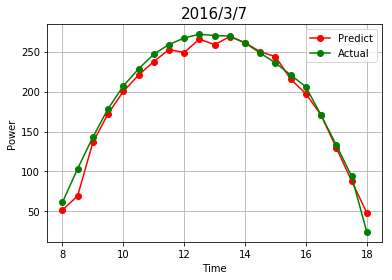

0.09575105900250357


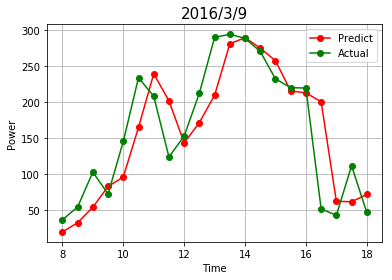

0.3828661874907742


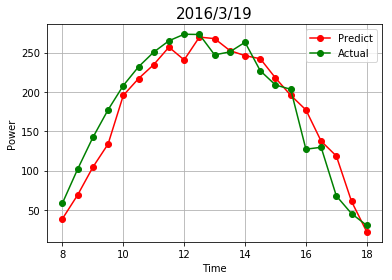

0.17326537285331728


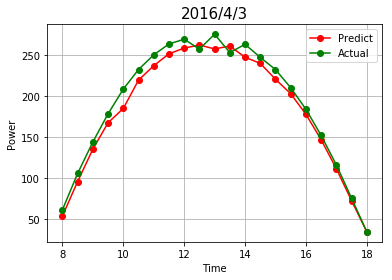

0.05240722091249476


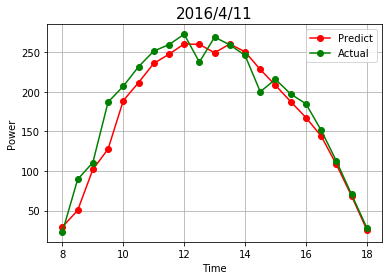

0.10208898536101148


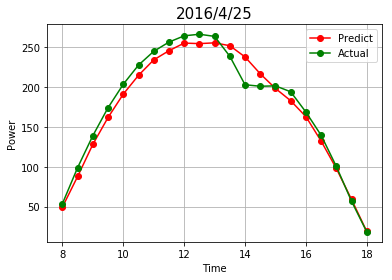

0.05770772120708429


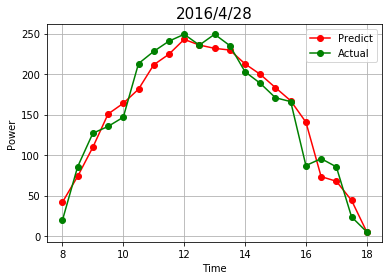

0.19898282225625663


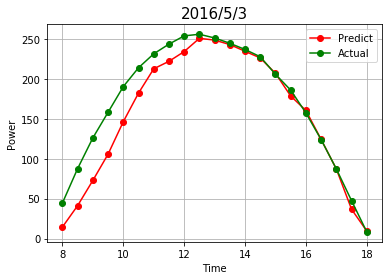

0.14607744222788938


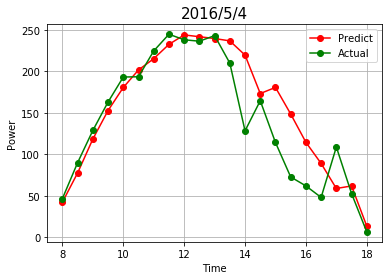

0.3100592206636672


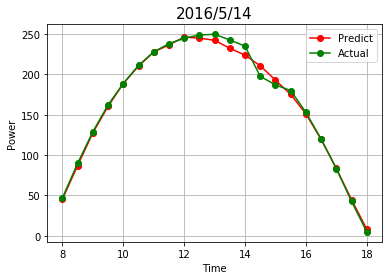

0.054829279970620155


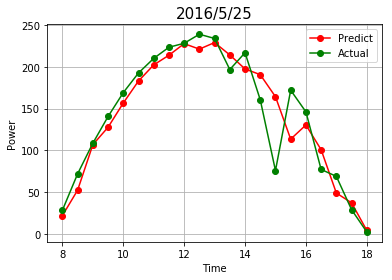

0.21935545626161665


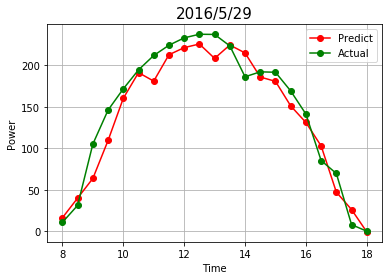

8.757110999750548


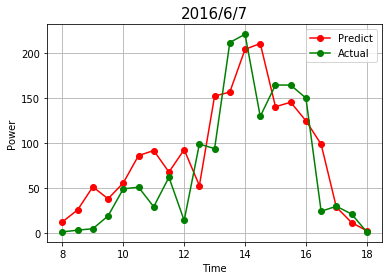

2.2419318568674202


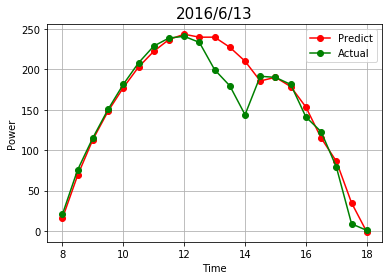

0.3246287877662052


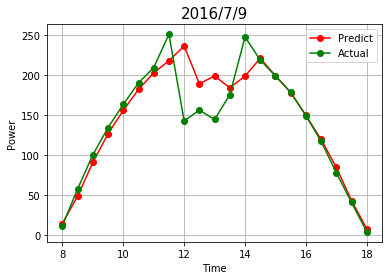

0.16011743803792208


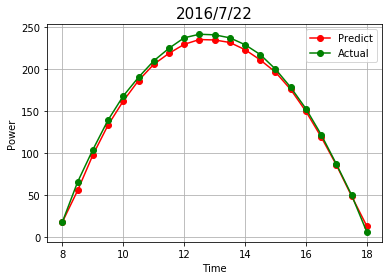

0.0843616489246429


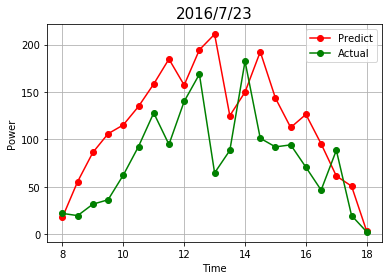

0.8059332529988465


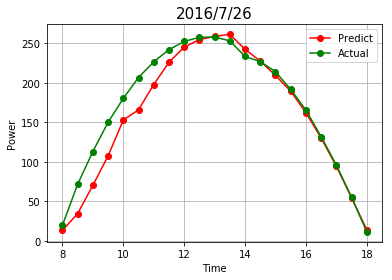

0.11959050496933056


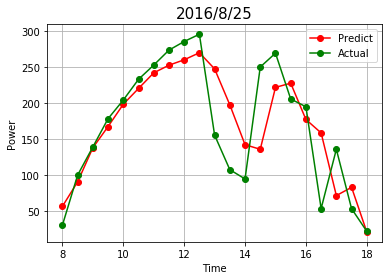

0.3401836086564084


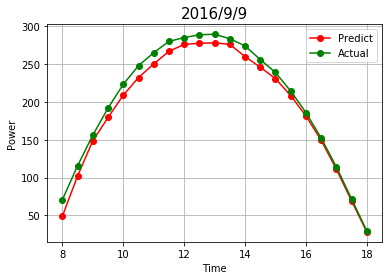

0.057492773780805424


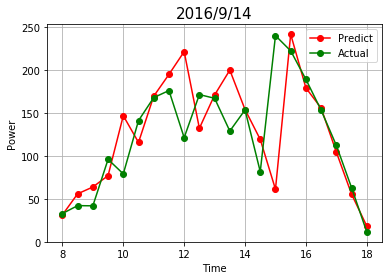

0.28445077004651753


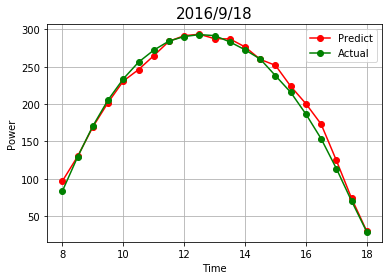

0.03761062986976394


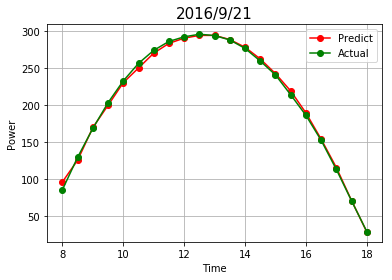

0.017709319821009414


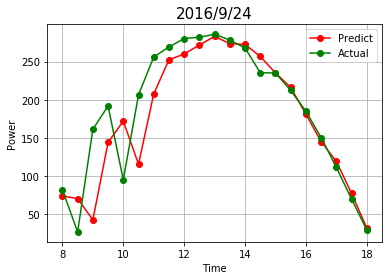

0.230847437895615


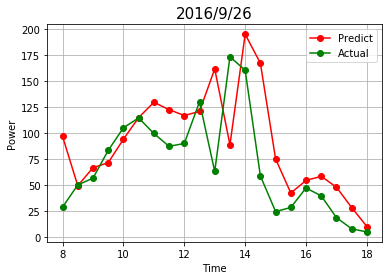

0.7928031934739689


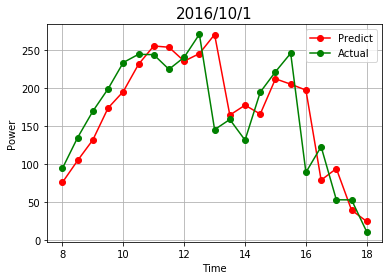

0.3200223670054978


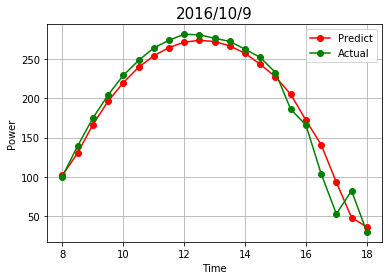

0.11313707326772009


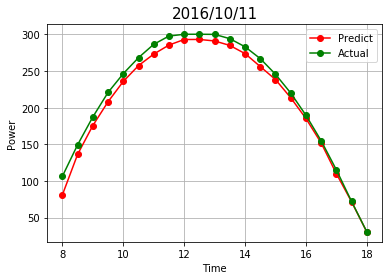

0.045631076431383796


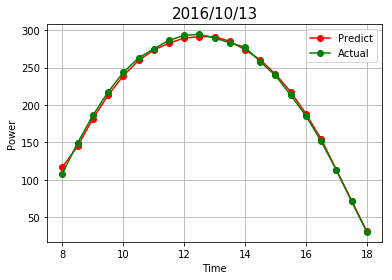

0.017662432902205233


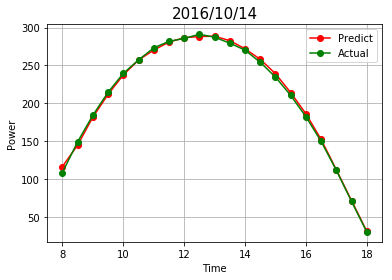

0.015561556135790475


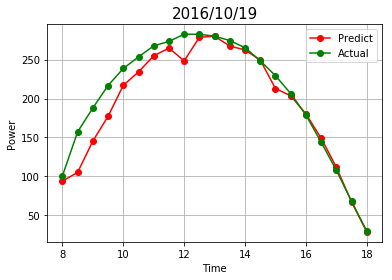

0.06838173203434449


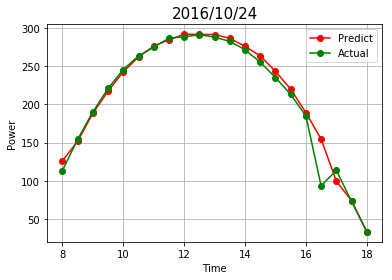

0.05563685300499916


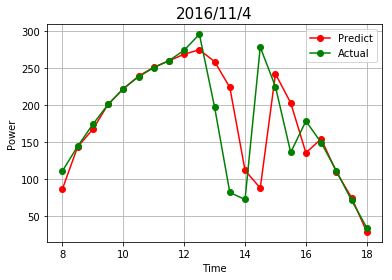

0.22518085135775787


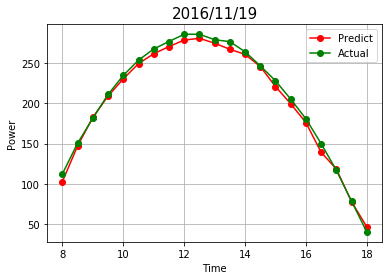

0.03088404735973681


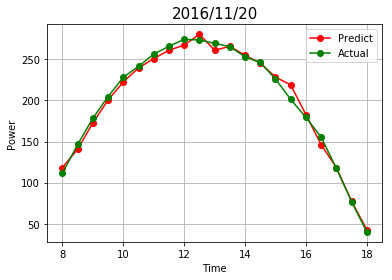

0.02747277397998027


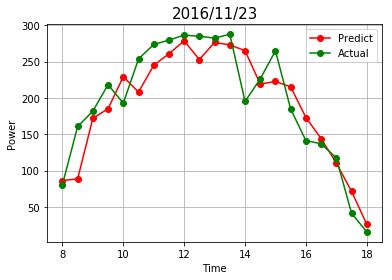

0.1866575363828956


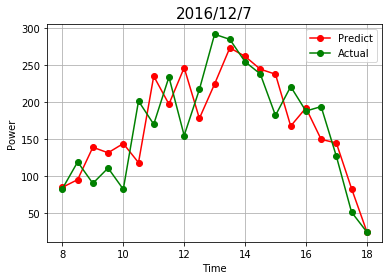

0.25361784178510555


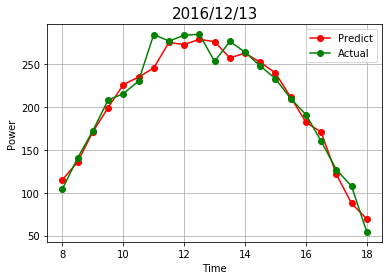

0.06196808333453437


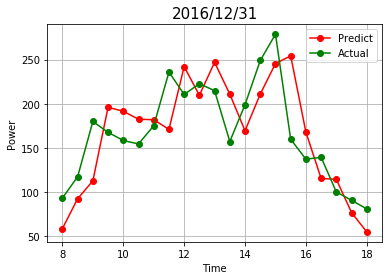

0.21709660054889712


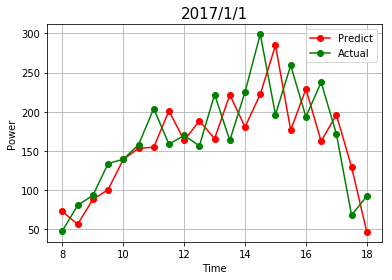

0.2745310090127072


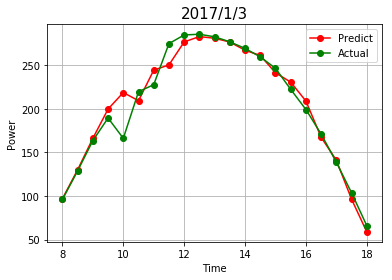

0.047478257556185274


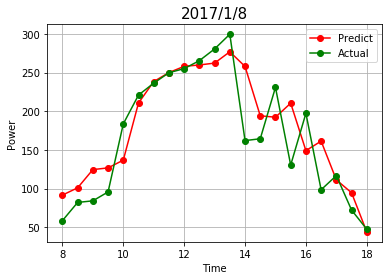

0.23524424988367315


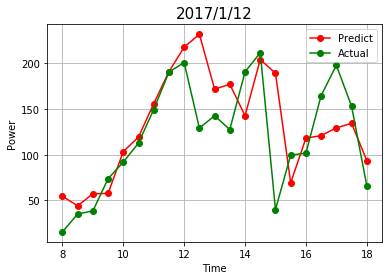

0.5117645542960436


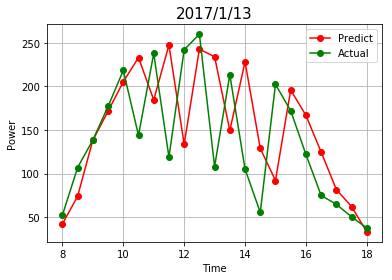

0.4438755180734829


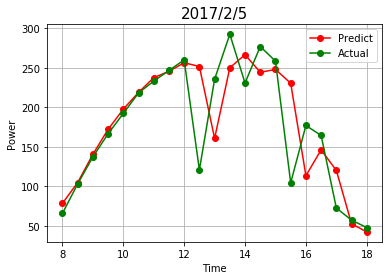

0.22446806369378575


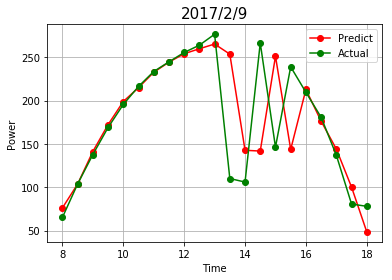

0.2025306449227291


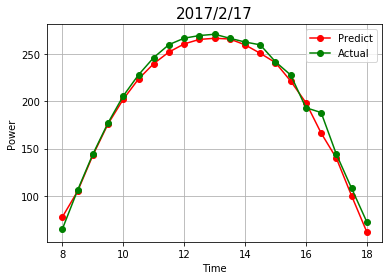

0.039938015988330626


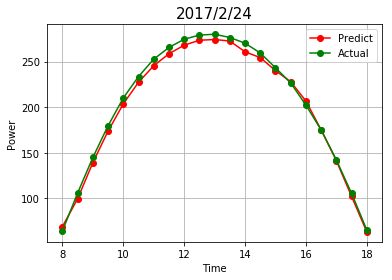

0.026823943788338005


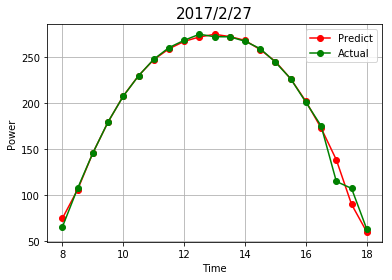

0.030088046467553364


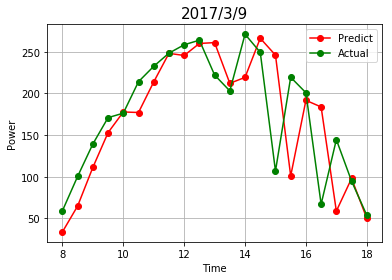

0.29594573771549204


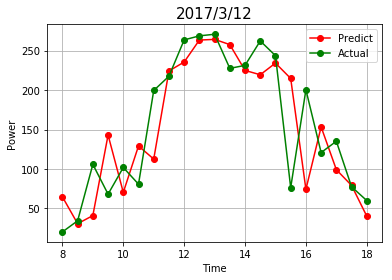

0.4389308288579582


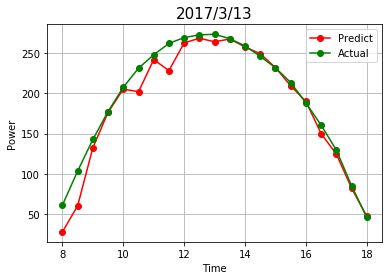

0.07656860915456333


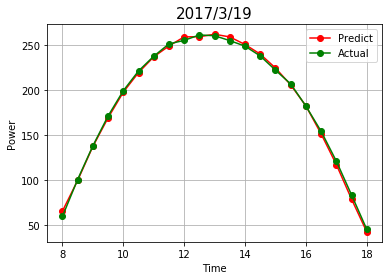

0.01909440105143566


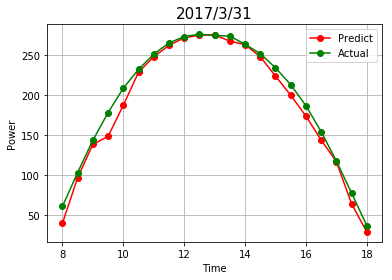

0.06869882355742596


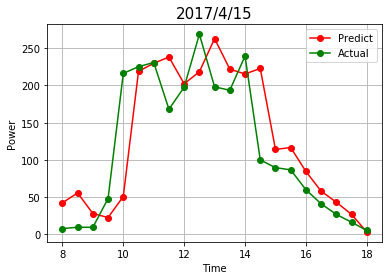

0.8552308381668955


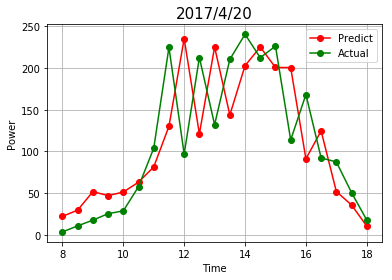

0.8242693289096404


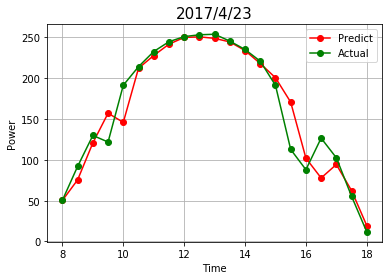

0.1356096872672748


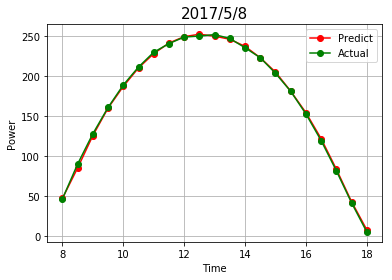

0.034036341402601054


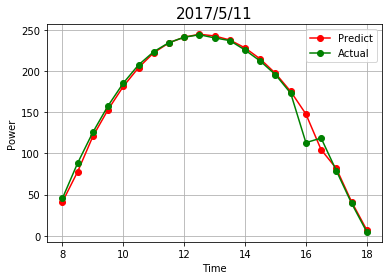

0.06737864326111168


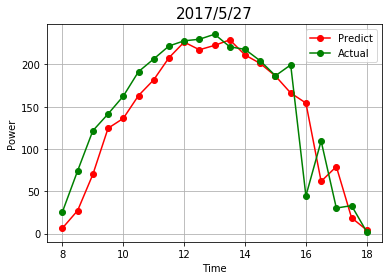

0.42314079345107547


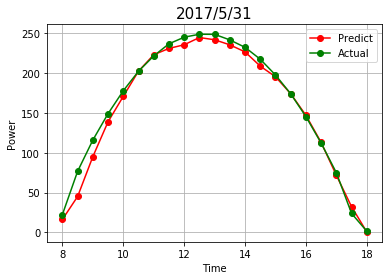

0.10301617042593794


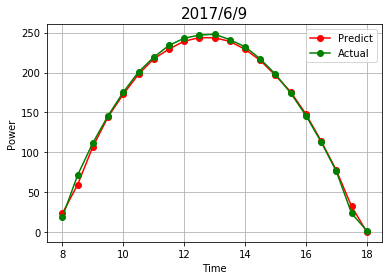

0.0934892729691752


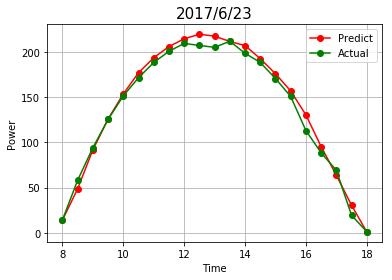

0.07973279094686987


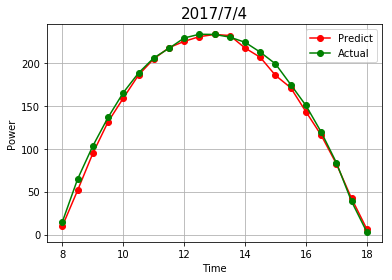

0.10507171485544547


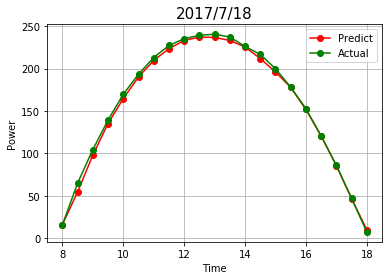

0.03858541218927734


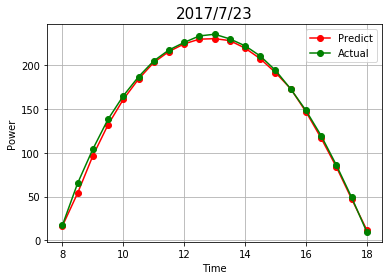

0.03932184240758872


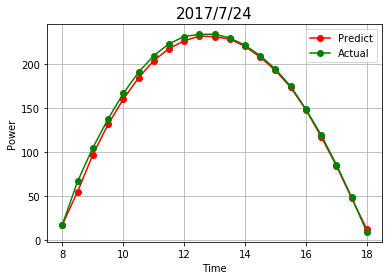

0.04316381949519284


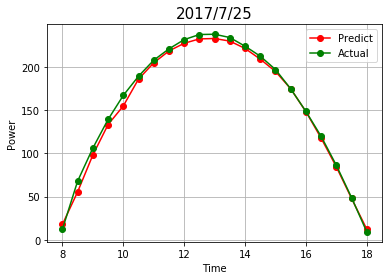

0.06632839005538127


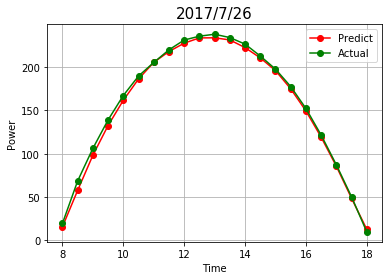

0.04999710591307224


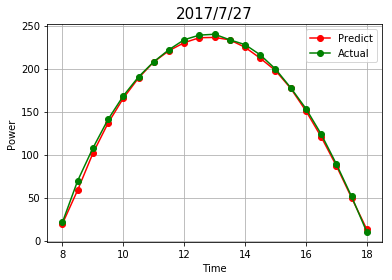

0.039518410833983116


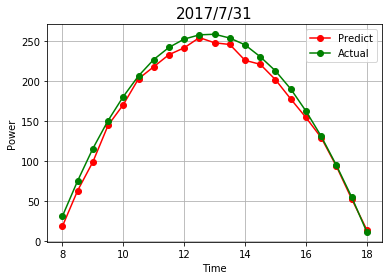

0.07690896712832318


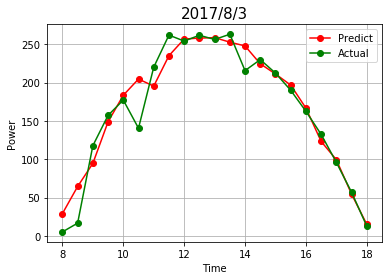

0.4344838362077529


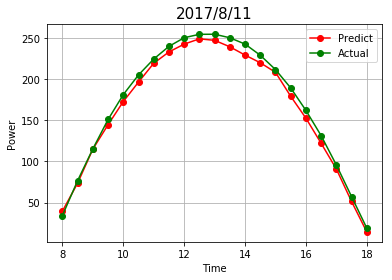

0.05680255698975624


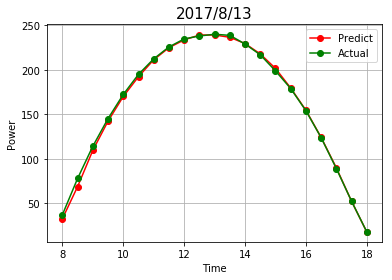

0.018897672562926036


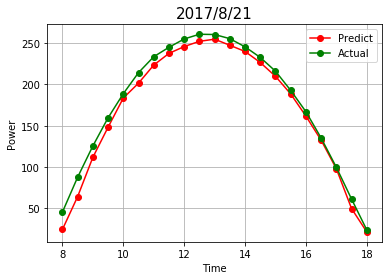

0.07843817195562364


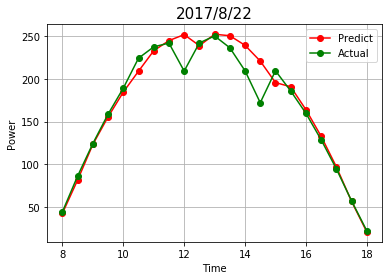

0.05718654759969189


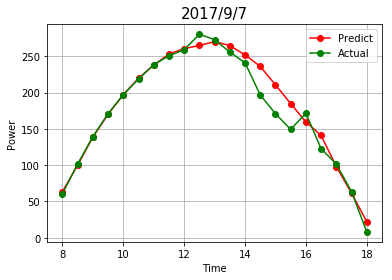

0.14205082285168316


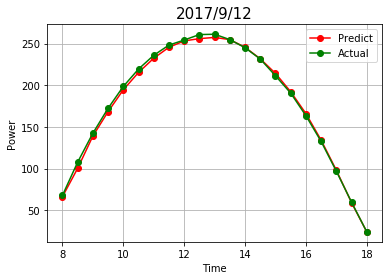

0.015227337540962333


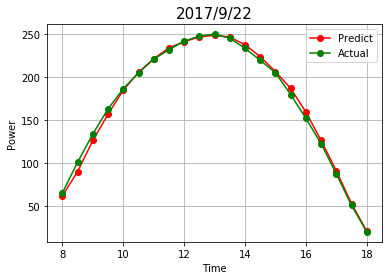

0.02743726743886918


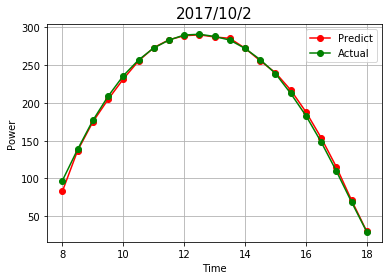

0.020593408609612278


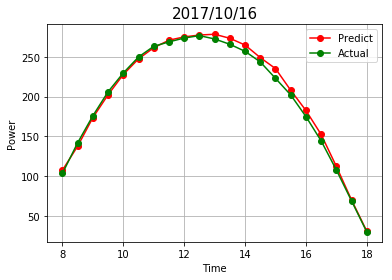

0.02451819398860163


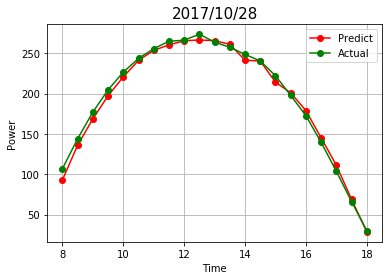

0.03366769303633528


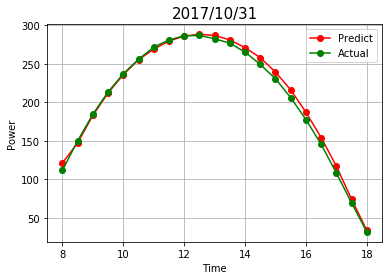

0.030805524380339004


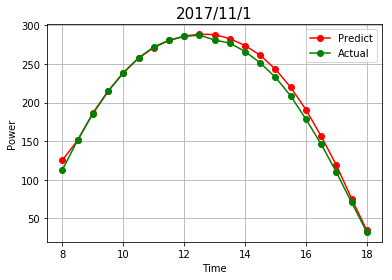

0.03338753021907787


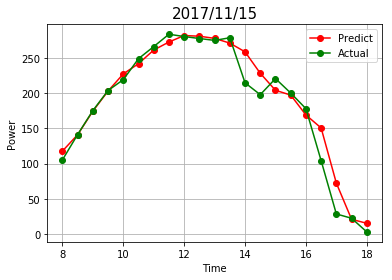

0.32480545145546025


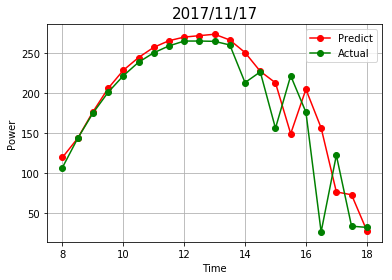

0.3778470440907296


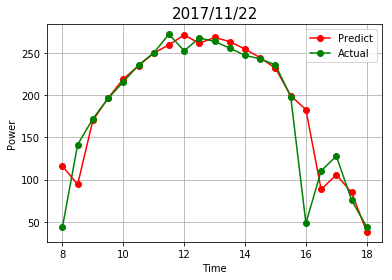

0.27120245048704306


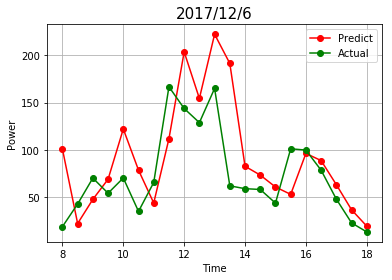

0.6757295391408054


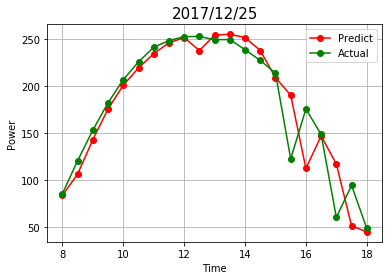

0.1409366370515381


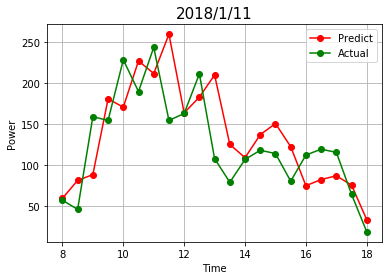

0.3446482883262517


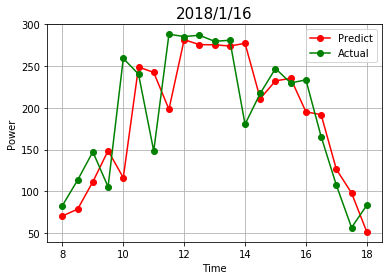

0.23753471095215128


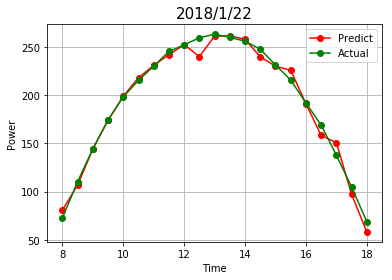

0.03564213555933642


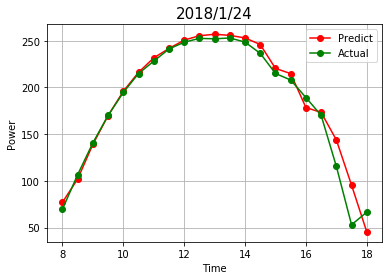

0.08578501438346745


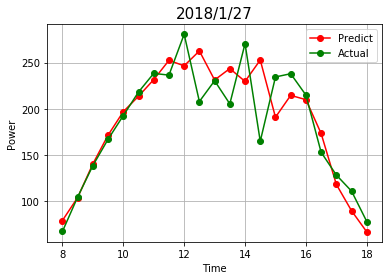

0.11793966544977301


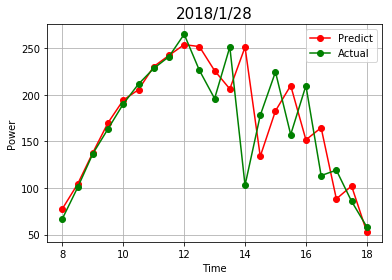

0.20373257148276025


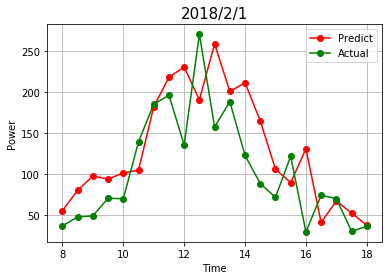

0.5695786757044224


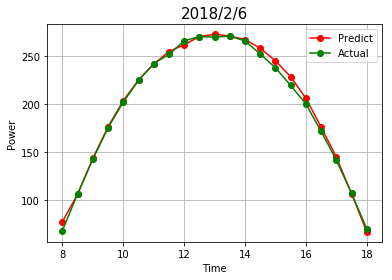

0.020517996290124286


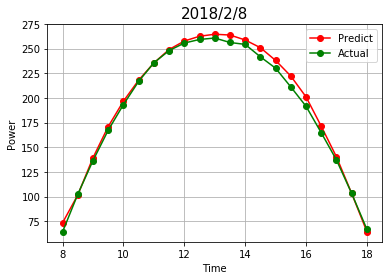

0.02747584434818224


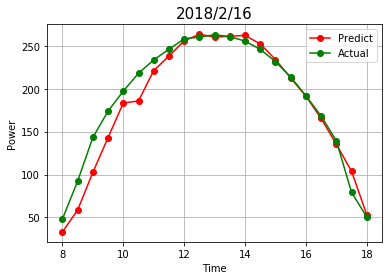

0.09309083982550055


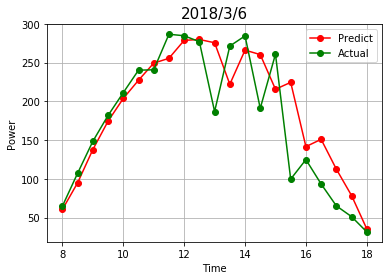

0.2480793770834228


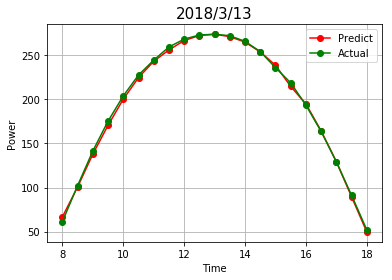

0.01576633055849419


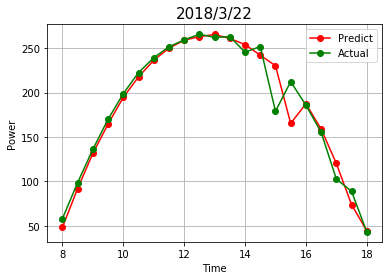

0.06548858566054545


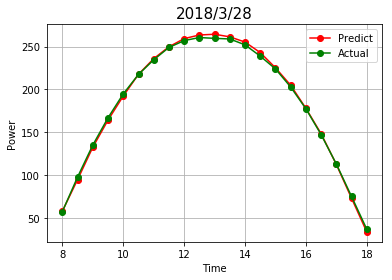

0.015184167237091825


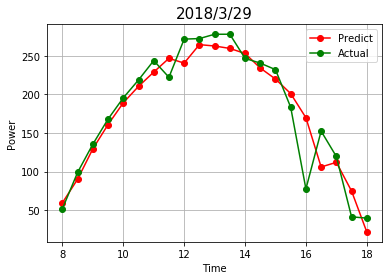

0.1833104229044713


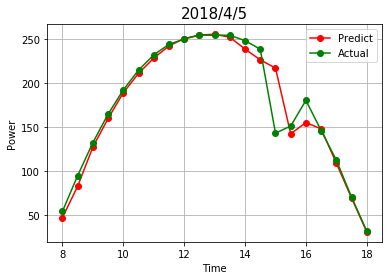

0.06116432585105252


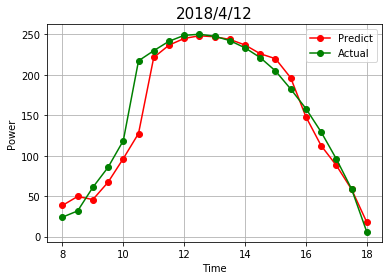

0.23128018920551172


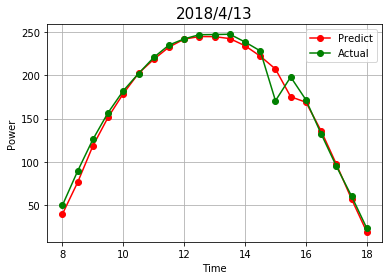

0.05733024142851192


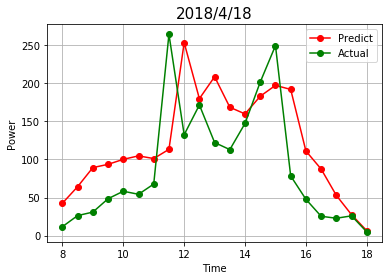

0.9068647900447343


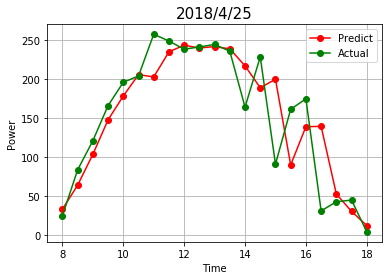

0.4438046555266265


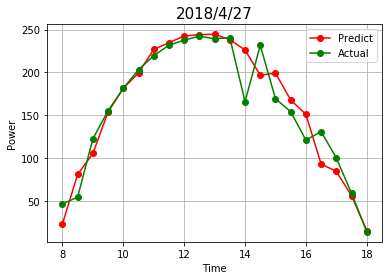

0.13799253103639952


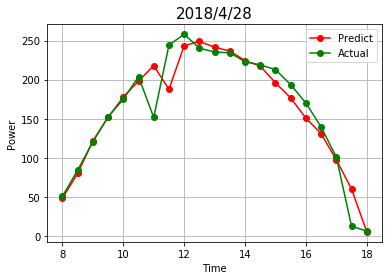

0.25397561499218724


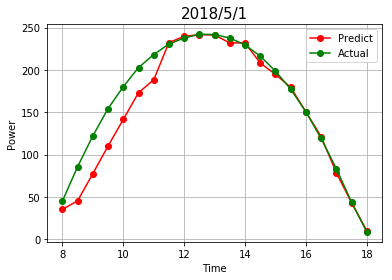

0.10515423595466056


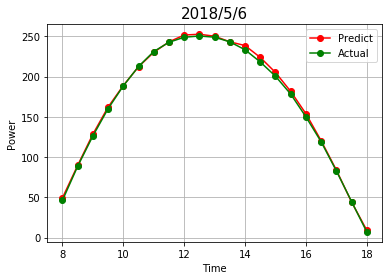

0.02864394337131747


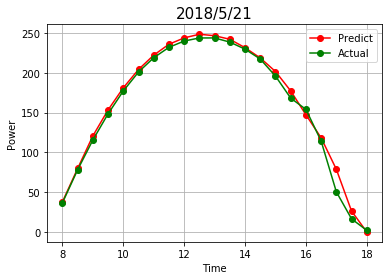

0.12302115281039412


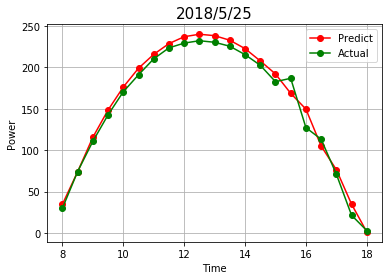

0.1046242560407876


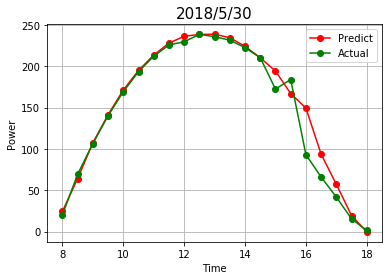

0.17208034180730847


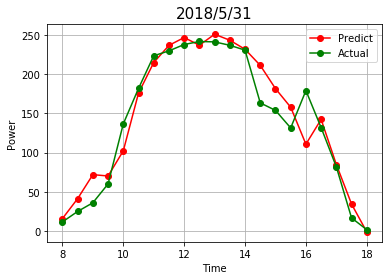

0.3039030348104856


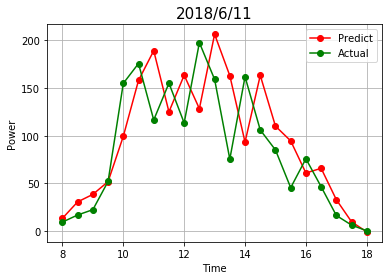

0.8121785062166017


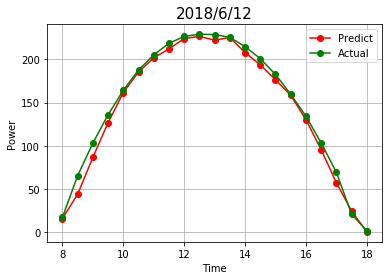

0.1062473512224005


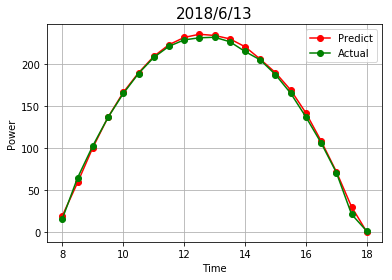

0.07226515147278094


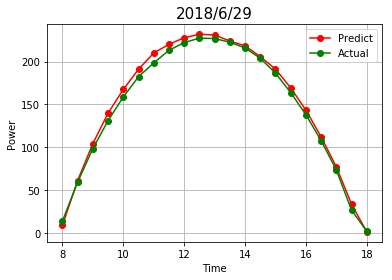

0.07496058692512933


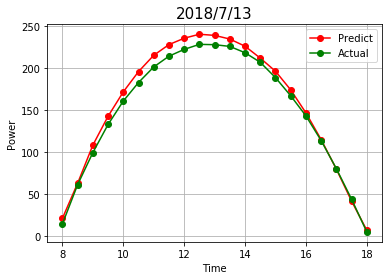

0.08158223209855388


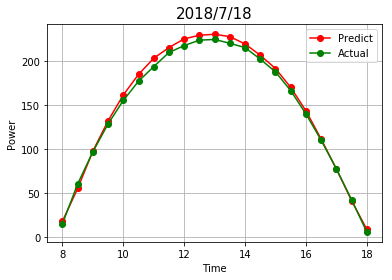

0.060122516359080294


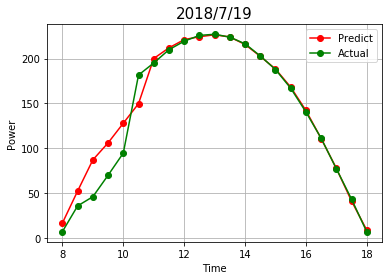

0.19593032262141535


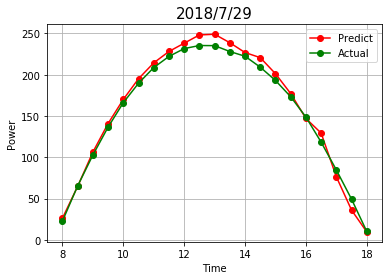

0.056246040942563885


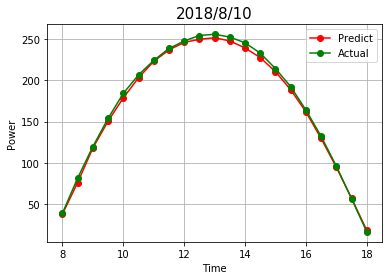

0.024026207391501964


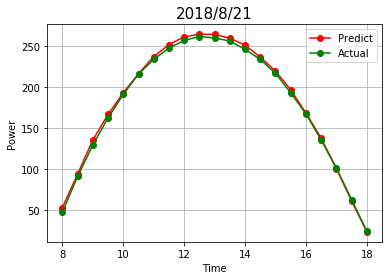

0.022809675139638615


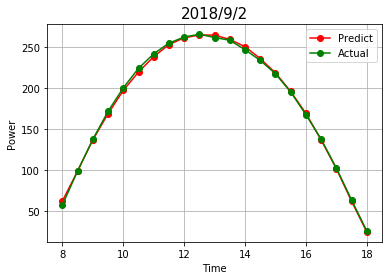

0.014517820935283107


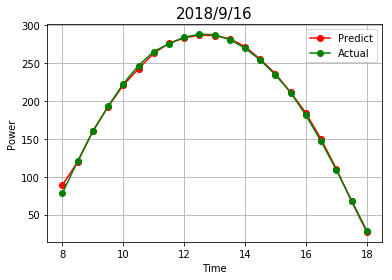

0.016586038657798657


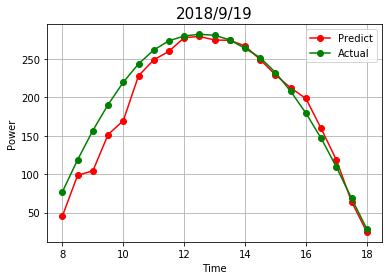

0.0993060007410505


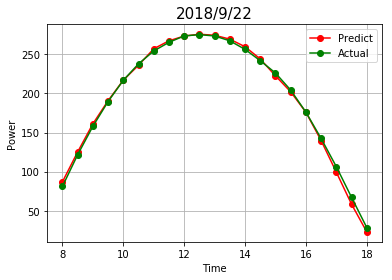

0.02986577068222344


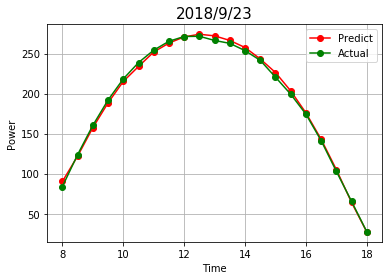

0.0172881645677944


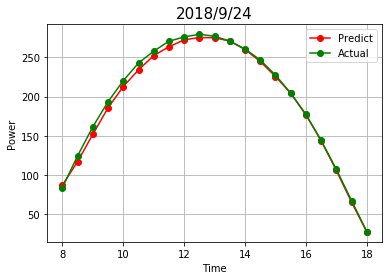

0.02049759772017092


ValueError: x and y must have same first dimension, but have shapes (21,) and (0,)

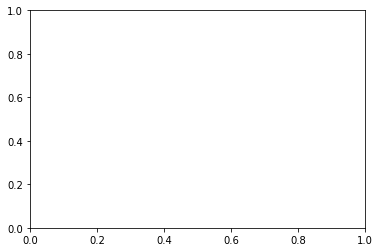

In [10]:
import matplotlib.pyplot as plt
x = [8+i*0.5 for i in range(21)]
for i in range(21*len(test_list)-21):
    if i%21 == 0:
        plt.plot(x,predict_power[i:i+21],'r-o',label = 'Predict')
        plt.plot(x,test_label[i:i+21],'g-o',label = 'Actual')
        plt.xlabel('Time')
        plt.ylabel('Power')
        title = switch(test_date[i])
        plt.title(title,fontsize = 15)
        plt.grid(True)
        plt.legend()
        plt.show()
        print(np.mean(mape[i:i+21]))
    else:
        continue